In [21]:
import pandas as pd
import numpy as np
import math

In [22]:
df_raw = pd.read_excel('vr_lab.xlsx', names = None)
df_raw

,Student 1 (Артем),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,эфф. Bandwidth КБ/с,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Delay, ms",20.00,50.000,200.000,500.00,1500.0,NaN,NaN,13500.0,NaN,...,10.0,20.000000,50.000000,75.0,100.0,200.000000,500.0,1000.000000,1500.000000,2000.000000
1,"MOS(delay), test 1",5.00,5.000,3.000,2.00,1.0,NaN,NaN,NaN,NaN,...,4.3,4.222222,3.384615,3.5,3.5,2.166667,1.5,1.555556,2.111111,1.222222
2,"MOS(delay), test 2",5.00,5.000,3.000,2.00,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"MOS(delay), test 3",5.00,4.000,3.000,3.00,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"PLR, %",0.01,0.025,0.075,0.15,0.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,"MOS(delay), test 3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,"PLR, %",0.01,0.040,0.075,0.10,0.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,"MOS(PLR), test 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,"MOS(PLR), test 2",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
bands = [13500, 14000, 13500, 12000, 12500, 12000]
dataset = []
student = 0
delays = []
plrs = []
expType = ''

for i, row in df_raw.iterrows():
    if str(row[0]).find("tudent") != -1:
        student += 1
        
    elif str(row[0]).find("ms") != -1:
        delays.clear()
        expType = 'delay'
        for i in range(1, 1 + 5):
            # print(row[i])
            delays.append(float(row[i]))
            
    elif str(row[0]).find("%") != -1:
        plrs.clear()
        expType = 'plr'
        for i in range(1, 1 + 5):
            plrs.append(float(row[i]))
            
    elif str(row[0]).find("MOS") != -1 and str(row[1]) != 'nan':
        for i in range(1, 1 + 5):
            try:
                mos = float(row[i])
                if mos == None:
                    raise Exception()
                exp = {}
                exp['type'] = expType
                exp['mos'] = mos
                exp['student'] = student
                
                if expType == 'plr':
                    exp['delay'] = 0
                    exp['plr'] = plrs[i - 1]
                else:
                    exp['delay'] = delays[i - 1]
                    exp['plr'] = 0
                dataset.append(exp)
            except Exception as exc:
                print(exc)
            
        
df = pd.DataFrame(dataset)
df.sample(5)


,type,mos,student,delay,plr
166,plr,3.0,5,0.0,0.025
161,delay,4.0,5,50.0,0.000
101,delay,4.0,3,75.0,0.000
35,delay,3.0,1,10.0,0.000
168,plr,2.0,5,0.0,0.150


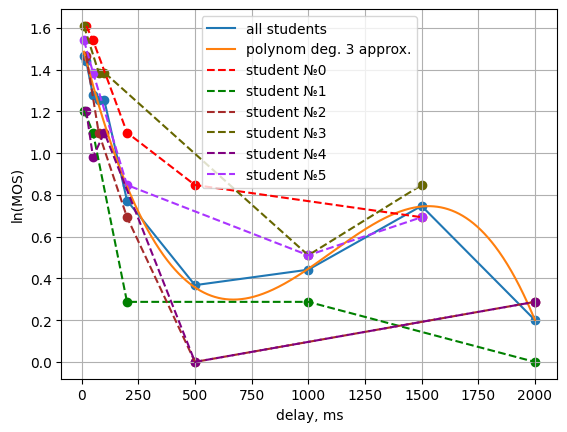

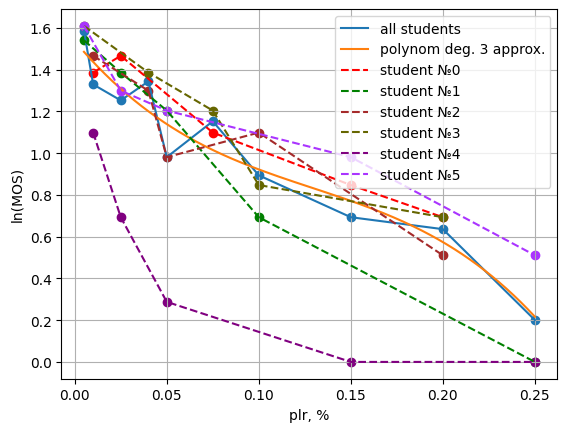

In [24]:
import matplotlib.pyplot as plt 

for expType, dfType in df.groupby('type'):
    # for val, df3 in dfType.groupby(expType):
    #     print(f'{expType}={val}, count={df3.size // 5}')
    
    x = sorted(dfType[expType].unique())
    # approx_func = lambda x : x
    approx_func = lambda x : np.log(x)
    # approx_func = lambda x : np.sqrt(np.log(x))
    # approx_func = lambda x : np.log(np.log(x))
    
    y = dfType.groupby(expType).mean('mos').sort_values(expType)['mos']
    y = approx_func(y)
    
    degree = 3
    coefs = np.polyfit(x, y, degree)
    xPoly = np.linspace(x[0], x[-1], 1000)
    yPoly = np.polyval(coefs, xPoly)
    
    plt.scatter(x, y)
    plt.plot(x, y, label="all students")
    plt.plot(xPoly, yPoly, label=f'polynom deg. {degree} approx.')
    
    colors=['red', 'green', 'brown', '#666600', 'purple', '#aa34ff']
    color = 0
    for student, dfStudent in dfType.groupby('student'):
        x = sorted(dfStudent[expType].unique())
        y = dfStudent.groupby(expType).mean('mos').sort_values(expType)['mos']
        y = approx_func(y)
        plt.plot(x, y, label = f'student №{student}', linestyle='--', color=colors[color])
        plt.scatter(x, y,color=colors[color])
        color += 1
    
    unit = '%' if expType == 'plr' else 'ms'
    plt.xlabel(f'{expType}, {unit}')
    plt.ylabel('ln(MOS)')
    plt.grid()
    plt.legend(loc='best')
    plt.savefig(f"{expType}_approx.png")
    plt.show()
    plt.close()
